Giventhe clinical parameters about a patient , can we predict whether or not they have heart disease?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("162 - heart-disease.csv")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


<Axes: xlabel='target'>

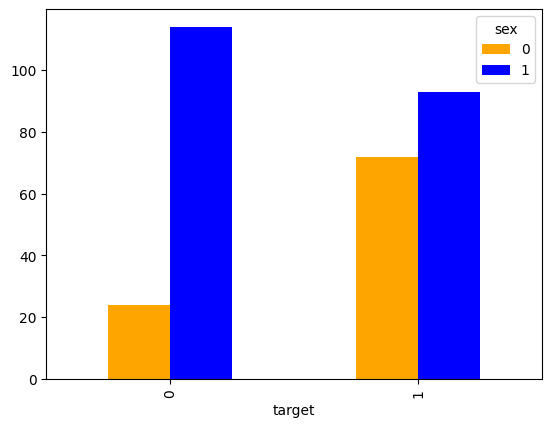

In [10]:
pd.crosstab(df['target'], df['sex']).plot(kind='bar', color=['orange','blue'])

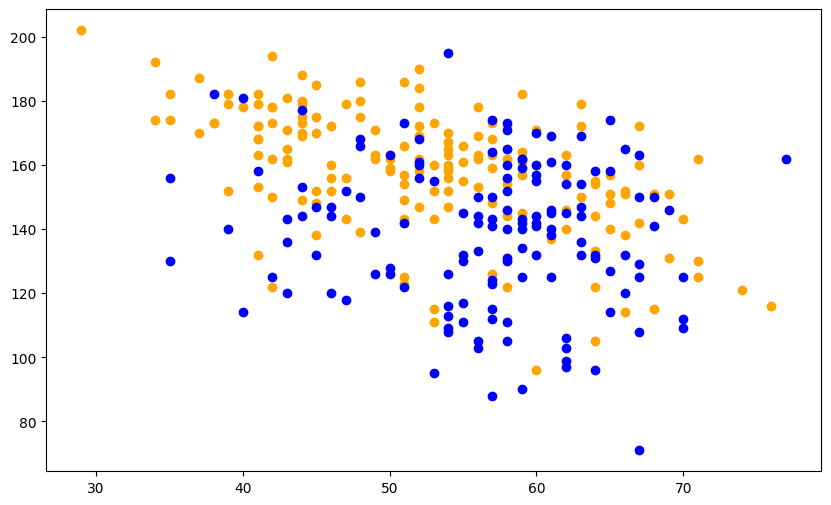

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df['age'][df['target']==1],df['thalach'][df['target']==1],c='orange')
plt.scatter(df['age'][df['target']==0],df['thalach'][df['target']==0],c='blue')



<Axes: >

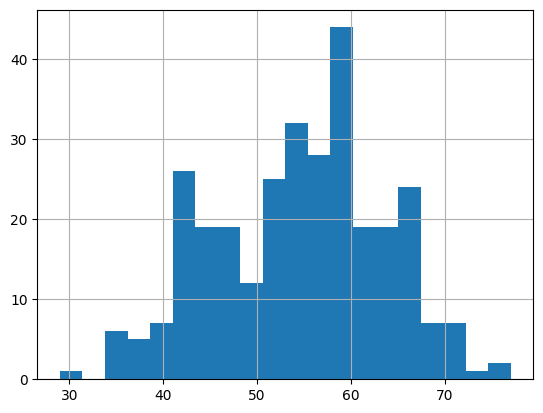

In [12]:
df['age'].hist(bins=20)

In [13]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Axes: xlabel='cp'>

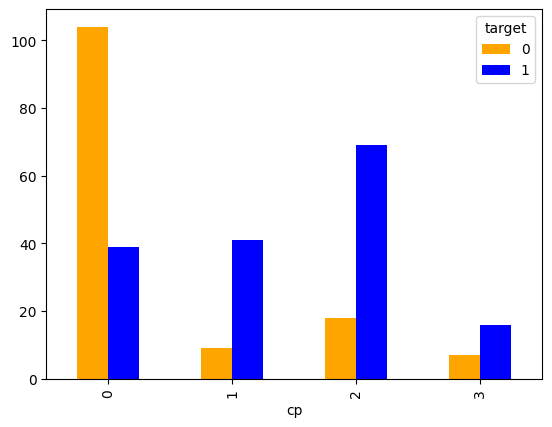

In [14]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['orange','blue'])

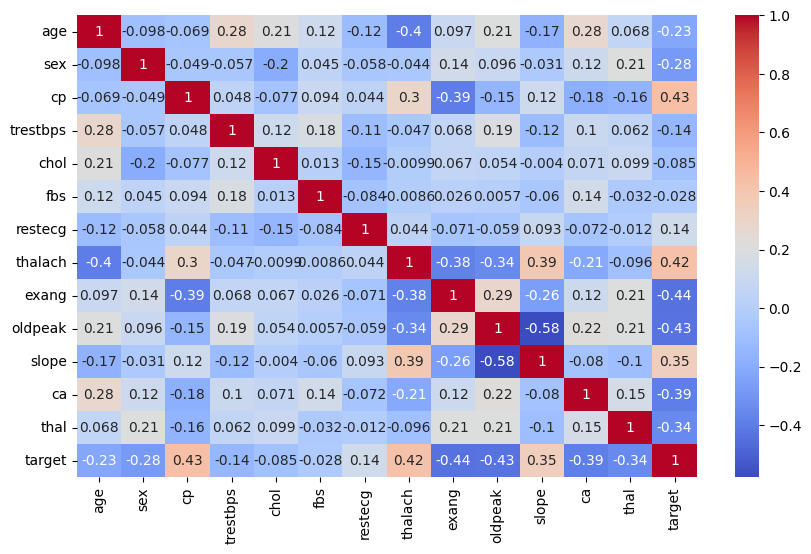

In [15]:
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr , annot=True, cmap='coolwarm')
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
X = df.drop('target',axis=1)

In [18]:
y = df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [21]:
#Trying three different types of models here 
#Logistic Regression
#Random Forest Classifier
#K-Nearest Neighbour

In [22]:
#FOR LOGISITC

model_logistic = LogisticRegression()
model_knn = KNeighborsClassifier()
model_rfc = RandomForestClassifier()

In [23]:
model_logistic.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred = model_logistic.predict(X_test)

In [25]:
print(confusion_matrix(y_pred, y_test))

[[32  8]
 [ 9 42]]


In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        40
           1       0.84      0.82      0.83        51

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [27]:
#FOR KNN

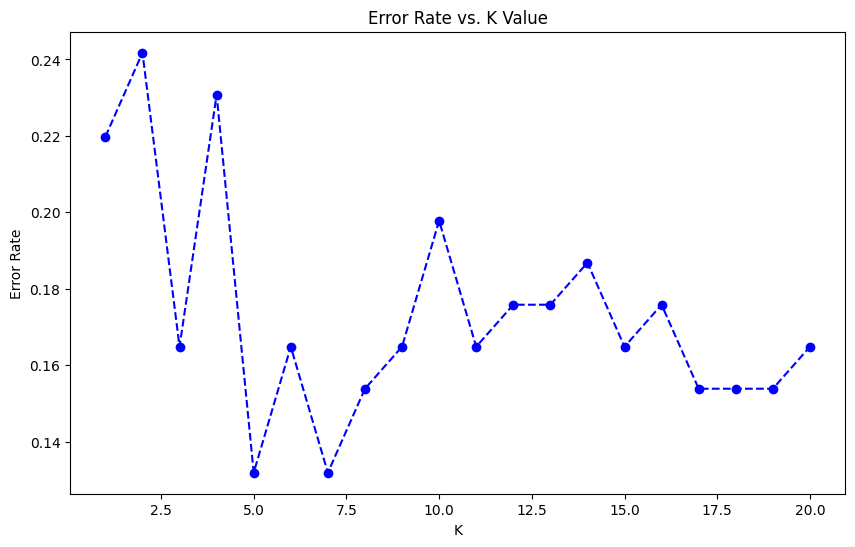

In [28]:
error_rates = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test))


plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='dashed', color='b')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [29]:
model_knn = KNeighborsClassifier(n_neighbors=10)

In [30]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
y_pred2 = model_knn.predict(X_test)

In [32]:
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        43
           1       0.80      0.83      0.82        48

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [33]:
model_rfc.fit(X_train,y_train)

RandomForestClassifier()

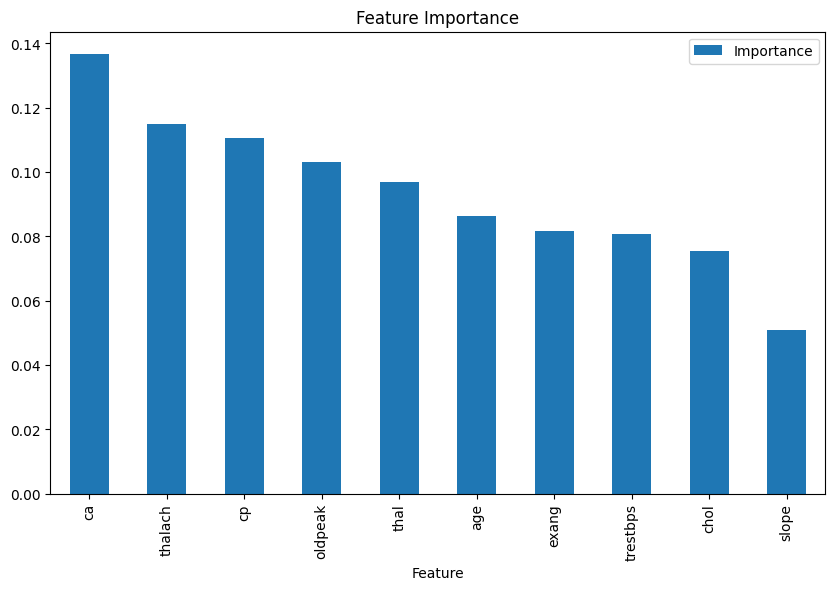

In [34]:
importances = model_rfc.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False).head(10).plot(
    x='Feature', y='Importance', kind='bar', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()

In [35]:
y_pred3 = model_rfc.predict(X_test)

In [36]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        42
           1       0.82      0.84      0.83        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [37]:
from sklearn.metrics import accuracy_score

In [38]:
LR = print(accuracy_score(y_pred, y_test))
KNN = print(accuracy_score(y_pred2, y_test))
RFC = print(accuracy_score(y_pred3, y_test))

0.8131868131868132
0.8021978021978022
0.8131868131868132


In [39]:
comparison = pd.DataFrame({'Model':['LR','KNN', 'RFC'], 'Accuracy':[0.813, 0.692, 0.802]})

<Axes: xlabel='Model', ylabel='Accuracy'>

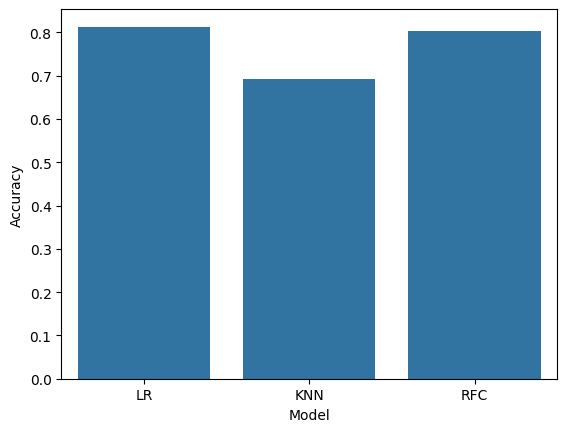

In [40]:
sns.barplot(comparison, x= 'Model', y= 'Accuracy')

In [41]:
#HYPER PARAMETER TUNING
#LOGISTIC
log_reg_grid = {"C": np.logspace(-4,4,20), "solver": ["liblinear"]}

#RFC
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
           "max_depth": [None,3, 5, 10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [42]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.03359818286283781)}

In [44]:
newpred= rs_log_reg.predict(X_test)

In [45]:
print(accuracy_score(newpred,y_test))

0.8351648351648352


In [46]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
rs_rf.best_params_

{'n_estimators': np.int64(60),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(7),
 'max_depth': 5}

In [48]:
newpred2 = rs_rf.predict(X_test)

In [49]:
print(accuracy_score(newpred2, y_test))

0.8461538461538461


In [50]:
# HYPER TUNING WITH GRIDSEARCHCV

In [51]:
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          scoring='f1', # or 'roc_auc'
                          verbose=True)


gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             scoring='f1', verbose=True)

In [52]:
gs_log_reg.best_params_

{'C': np.float64(0.008531678524172805), 'solver': 'liblinear'}

In [53]:
newpred3 = gs_log_reg.predict(X_test)

In [54]:
print(accuracy_score(y_test, newpred3))

0.8571428571428571


In [55]:
print(confusion_matrix(y_test, newpred3))

[[33  8]
 [ 5 45]]


In [56]:
print(confusion_matrix(y_test, newpred2))

[[33  8]
 [ 6 44]]


In [57]:
y_probs = gs_log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)


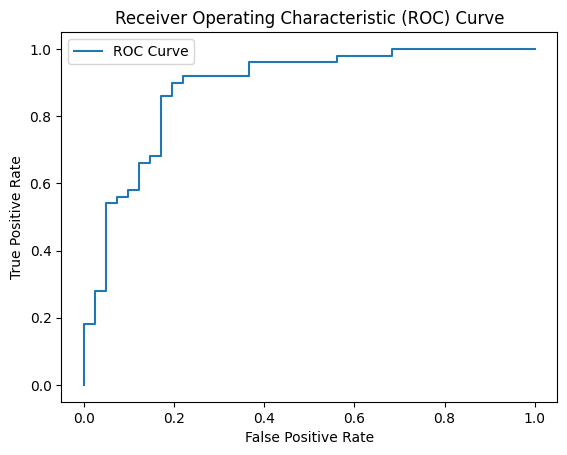

In [59]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="best")
plt.show()


In [60]:
gs_log_reg.best_params_

{'C': np.float64(0.008531678524172805), 'solver': 'liblinear'}

In [61]:
clf = LogisticRegression(C=0.008531678524172805,solver="liblinear")

In [62]:
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

In [63]:
cv_acc

array([0.7704918 , 0.81967213, 0.78688525, 0.76666667, 0.63333333])

In [64]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.7554098360655737)

In [65]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.7470972431177823)

In [66]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.8363636363636363)

In [67]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.7882137019675293)

In [68]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1}, index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.75541,0.747097,0.836364,0.788214


<Axes: title={'center': 'Cross-Validated Classification Metrics'}>

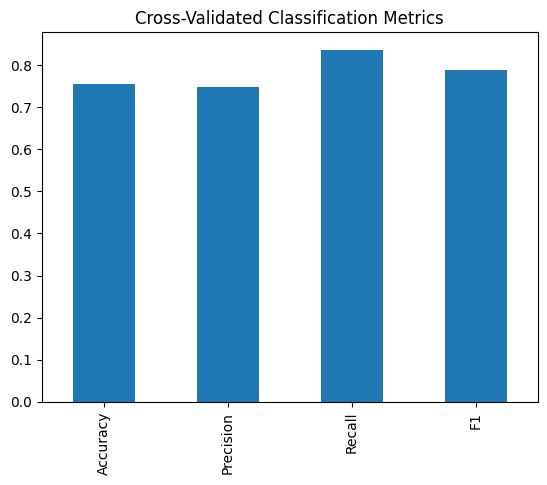

In [69]:
cv_metrics.T.plot.bar(title = "Cross-Validated Classification Metrics",legend = False)


In [70]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.008531678524172805, solver='liblinear')

In [71]:
clf.coef_

array([[-0.06719961, -0.14718222,  0.20063463, -0.01829896, -0.01844295,
         0.02609139,  0.04600006,  0.15565419, -0.19833882, -0.17388451,
         0.14131553, -0.21219826, -0.18544725]])

In [72]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [73]:
feature_dict

{'age': np.float64(-0.06719961335955131),
 'sex': np.float64(-0.14718221918065774),
 'cp': np.float64(0.20063462809520552),
 'trestbps': np.float64(-0.01829896127842054),
 'chol': np.float64(-0.018442946729353482),
 'fbs': np.float64(0.02609139443887557),
 'restecg': np.float64(0.046000063836960675),
 'thalach': np.float64(0.1556541947014572),
 'exang': np.float64(-0.19833882045561646),
 'oldpeak': np.float64(-0.17388451004356878),
 'slope': np.float64(0.14131552851739657),
 'ca': np.float64(-0.21219825899312242),
 'thal': np.float64(-0.18544724564834583)}

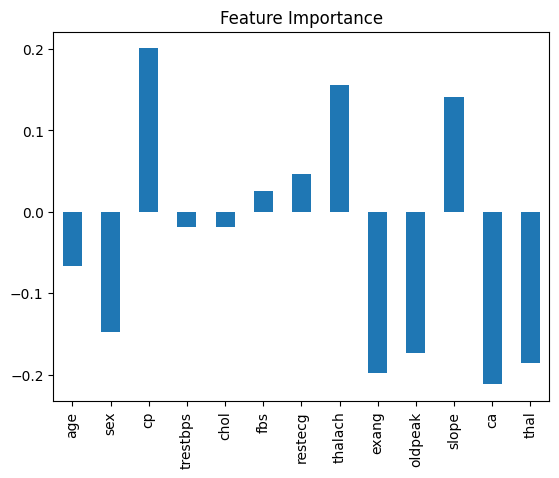

In [74]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title = "Feature Importance",legend=False);